# <center>Proposal</center>

## Title

## Introduction

## Preliminary exploratory data analysis:

### Loading Data into Jupyter

Loading the data from the website is pretty simple; we will use read_csv to accomplish that. We have decided to not download and save the dataset to save space. The dataset from the website does not have column names so we set col_names to FALSE in the argument. This will assign column names as X and followed by the number of the column. There is no point in renaming the bands but the last column is the type and is renamed as such.

In [4]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [10]:
sonar_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data" 

# does rename successfully but does not show in the red box
sonar_data <- read_csv(sonar_url, col_names = FALSE) |> 
    rename(type = X61) 

print(sonar_data, n = 5)

Rows: 208 Columns: 61
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): X61
dbl (60): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 208 × 61
      X1     X2     X3     X4     X5     X6    X7    X8     X9   X10    X11
   <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl> <dbl> <dbl>  <dbl> <dbl>  <dbl>
1 0.02   0.0371 0.0428 0.0207 0.0954 0.0986 0.154 0.160 0.311  0.211 0.161 
2 0.0453 0.0523 0.0843 0.0689 0.118  0.258  0.216 0.348 0.334  0.287 0.492 
3 0.0262 0.0582 0.110  0.108  0.0974 0.228  0.243 0.377 0.560  0.619 0.633 
4 0.01   0.0171 0.0623 0.0205 0.0205 0.0368 0.110 0.128 0.0598 0.126 0.0881
5 0.0762 0.0666 0.0481 0.0394 0.059  0.0649 0.121 0.247 0.356  0.446 0.415 
# … with 203 more rows, and 50 more variables: X12 <dbl>, X13 <dbl>, X14 <dbl>,
#   X15 <dbl>, X16 <dbl>, X17 <dbl>, X18 <dbl>, X19 <dbl>, X20 <dbl>,
#   X21 <dbl>, X22 <dbl>, X23 <dbl>, X24 <dbl>, X25 <dbl>, X26 <dbl>,
#   X27 <dbl>, X28 <dbl>, X29 <dbl>, X30 <dbl>, X31 <dbl>, X32 <dbl>,
#   X33 <dbl>, X34 <dbl>, X35 <dbl>, X36 <dbl>, X37 <dbl>, X38 <dbl>,
#   X39 <dbl>, X40 <dbl>, X41 <dbl>, X42 <dbl>, X43 <dbl>, X44 <dbl>,
#   X45 <dbl>, X4

### Wrangling data

Our first plan was to wrangle the dataset to have three columns: **band**(this will be a factor in range from X1 to X60), **value**(range from 0.0 to 1.0) and **type**(will be a factor; rocks(R) or mines(M)). However, after talking to the TA and facing difficulty in choosing appropriate inputs/predictors, we have decided to leave the dataset as is and have **bands** ranging from **X1** to **X60** in separate columns, and the last columns as X61 to be renamed as **type** with the same description as above. Moreover, we have decided to shuffle the data as it was arranged to be rocks and then mines; it would have made difficult to partition testing set and training set.


In [11]:
# shuffling data since it is arranged as R then M
sonar_set <- sonar_data[sample(1:nrow(sonar_data)), ]

### Exploratory data analysis(tables)

**Summary of exploration below all the code cells**

In [4]:
# verifying if the set matches the description
verify_count <- sonar_set |> 
    group_by(type)|>
    summarize(n())

verify_count

type,n()
<chr>,<int>
M,111
R,97


In [5]:
empty_obs <- colSums(is.na(sonar_set))

empty_obs

X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  X11  X12  X13  X14  X15  X16 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 X17  X18  X19  X20  X21  X22  X23  X24  X25  X26  X27  X28  X29  X30  X31  X32 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 X33  X34  X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  X46  X47  X48 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 X49  X50  X51  X52  X53  X54  X55  X56  X57  X58  X59  X60 type 
   0    0    0    0    0    0    0    0    0    0    0    0    0

In [6]:
rock_10_band_mean <- sonar_set |>
    filter(type == "R")|>
    select(X1:X10) |>
    map(mean) |>
    data.frame()
rock_10_band_mean

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.02249794,0.03030309,0.03595052,0.04144742,0.06202784,0.09622371,0.1141804,0.1175959,0.1373918,0.1593247


In [7]:
mine_10_band_mean <- sonar_set |>
    filter(type == "M")|>
    select(X1:X10) |>
    map(mean) |>
    data.frame()
mine_10_band_mean

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.03498919,0.04554414,0.05071982,0.06476757,0.08671532,0.111864,0.1283586,0.1498324,0.2134919,0.2510216


- First we matched the number of all the rocks and mines with the descriptions; matches
- We checked for empty cells in column; no empty cells
- Mean of first 10 band of each type; both have an increasing trend but stronger in mines

Further exploration through visualizations

### Exploratory data analysis (visual)

all mean line graph


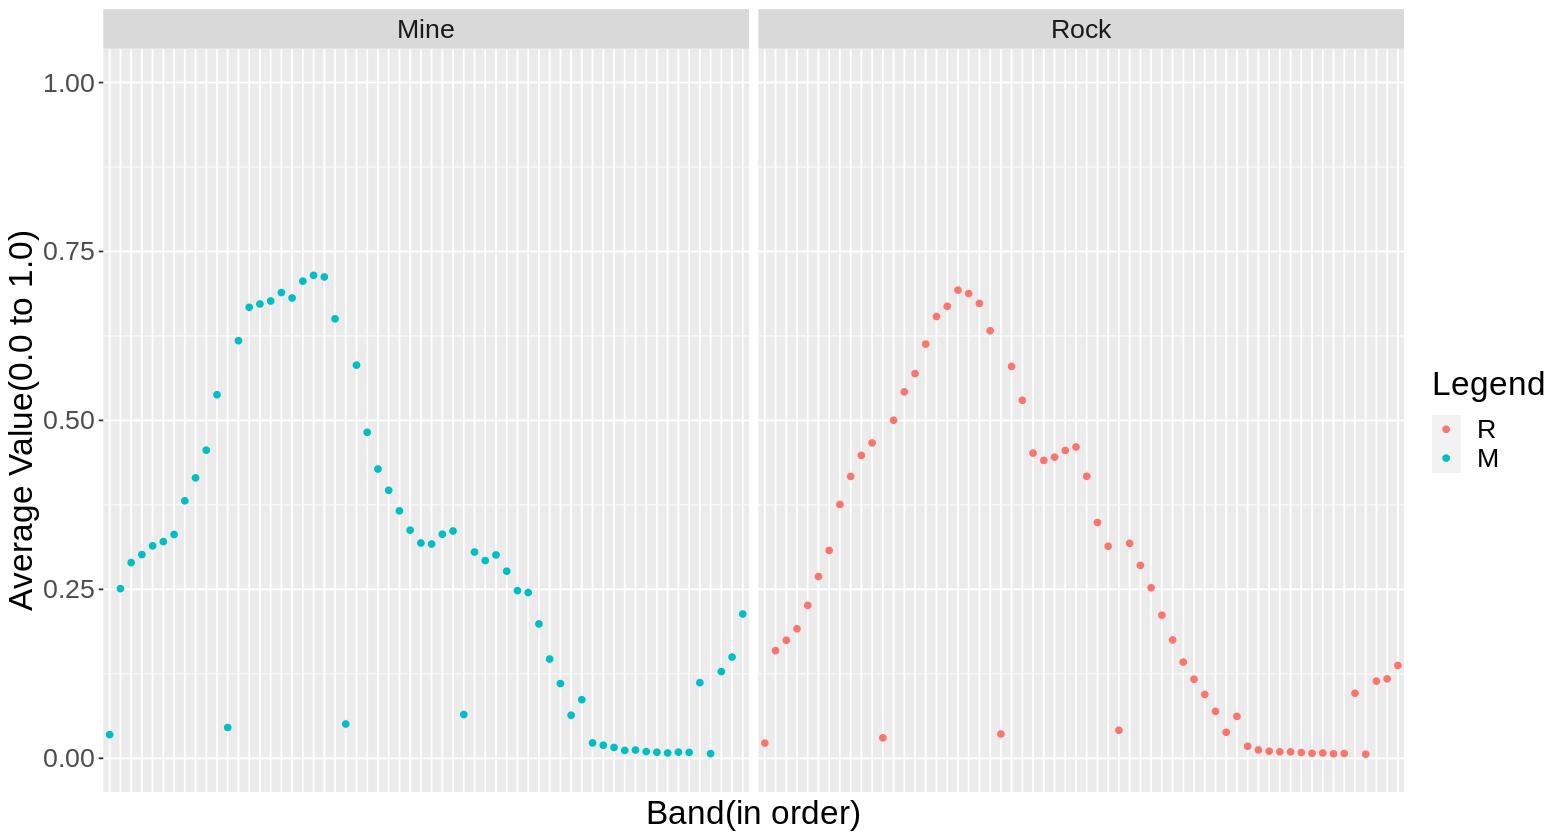

In [8]:
options(repr.plot.width = 13) 
rock_mean <- sonar_set |>
    filter(type == "R")|>
    select(-type) |>
    map(mean) |>
    data.frame()
rock_mean["type"] <- c("R")
mine_mean <- sonar_set |>
    filter(type == "M")|>
    select(-type) |>
    map(mean) |>
    data.frame()
mine_mean["type"] <- c("M")

plot_data <- rbind(rock_mean, mine_mean) |>
    pivot_longer(X1:X60, names_to = "band", values_to = "value")
# plot_data

mean_plot <- plot_data |>
    ggplot(aes(x = band, y = value, color = as_factor(type))) +
    geom_point() + 
    facet_grid(cols = vars(type), labeller = as_labeller(c(M = "Mine", R = "Rock"))) +
    labs(x = "Band(in order)", y = "Average Value(0.0 to 1.0)", color = "Legend") +
    ylim(0.0, 1.0)+
    theme(axis.text.x=element_blank(),
        axis.ticks.x=element_blank(), 
        text = element_text(size=20))
mean_plot

**Training Data**


In [5]:
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.



In [12]:
#Splitting our data into a training (75%) and testing (25%) set using the tidymodels package
set.seed(1437)

sonar_split <- initial_split(sonar_set, prop = 0.75, strata = type)
sonar_test <- testing(sonar_split)
sonar_train <- training(sonar_split)

#Testing to see if 75% of data was split into testing set
nrow(sonar_set)
nrow(sonar_train)
nrow(sonar_test)

[1] 208

[1] 155

[1] 53

In [13]:
any(is.na(sonar_set))
any(is.na(sonar_train)) #No missing data in training set

[1] FALSE

[1] FALSE

No missing data in the data set and in the training set

In [14]:
#Count of observations in the training set
obs_count_training <- sonar_train |> 
    group_by(type)|>
    summarize(n())
obs_count_training

type,n()
<chr>,<int>
M,83
R,72


In [23]:
#means of the predictor variables
mine_train_mean <- sonar_train |>
    filter(type == "M")|>
    select(-type) |>
    map_dfr(mean) |>
    select(X1, X10, X20, X30, X40, X50, X60) |>
    mutate(type = "M")

rock_train_mean <- sonar_train |>
    filter(type == "R")|>
    select(-type) |>
    map_dfr(mean) |>
    select(X1, X10, X20, X30, X40, X50, X60) |>
    mutate(type = "R")

sonar_train_mean <- full_join(rock_train_mean, mine_train_mean,
           by = c("X1", "X10", "X20", "X30", "X40", "X50", "X60", "type"))
sonar_train_mean <- sonar_train_mean |> 
    rename(X1_mean = X1, X10_mean = X10, X20_mean = X20, X30_mean = X30, X40_mean = X40, X50_mean = X50, X60_mean =X60)
sonar_train_mean

X1_mean,X10_mean,X20_mean,X30_mean,X40_mean,X50_mean,X60_mean,type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.02263889,0.1568069,0.4951139,0.5746500,0.3218236,0.01654167,0.006159722,R
0.03491325,0.2480398,0.6428072,0.5741639,0.3039699,0.02239518,0.006804819,M


Means of the predictor variables X1, X10, X20, X30, X40, X50 and X60 (Xn corresponding to measurement n) for both rocks and mines.
 - Mean increases from X1 to X30 (middle-most measurement) for both rocks and mines
 - Mean decreases from X30 to X60 for both rocks and mines

**Visualizing Training Data**

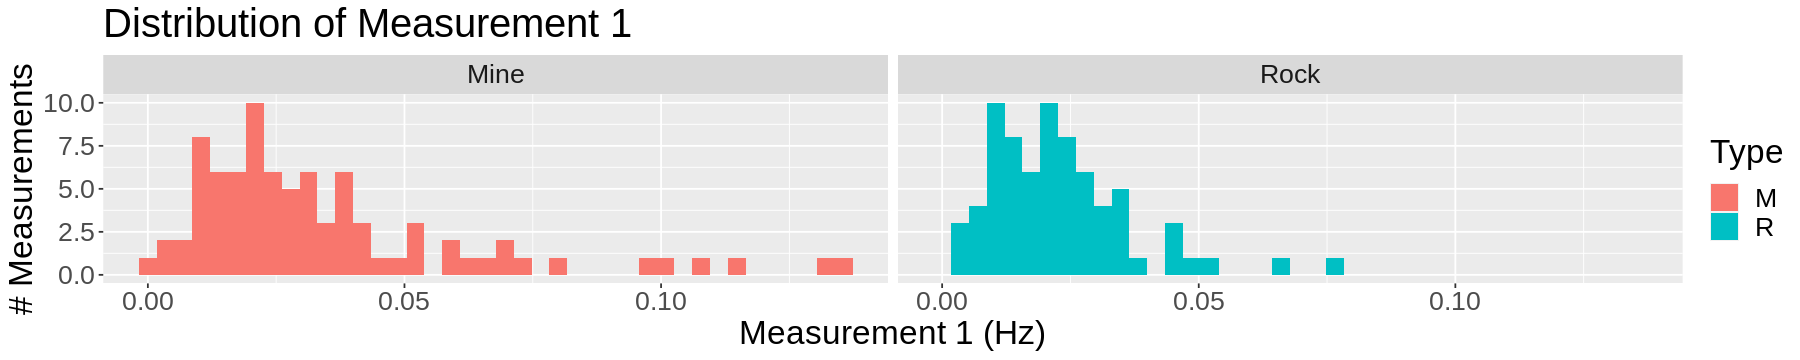

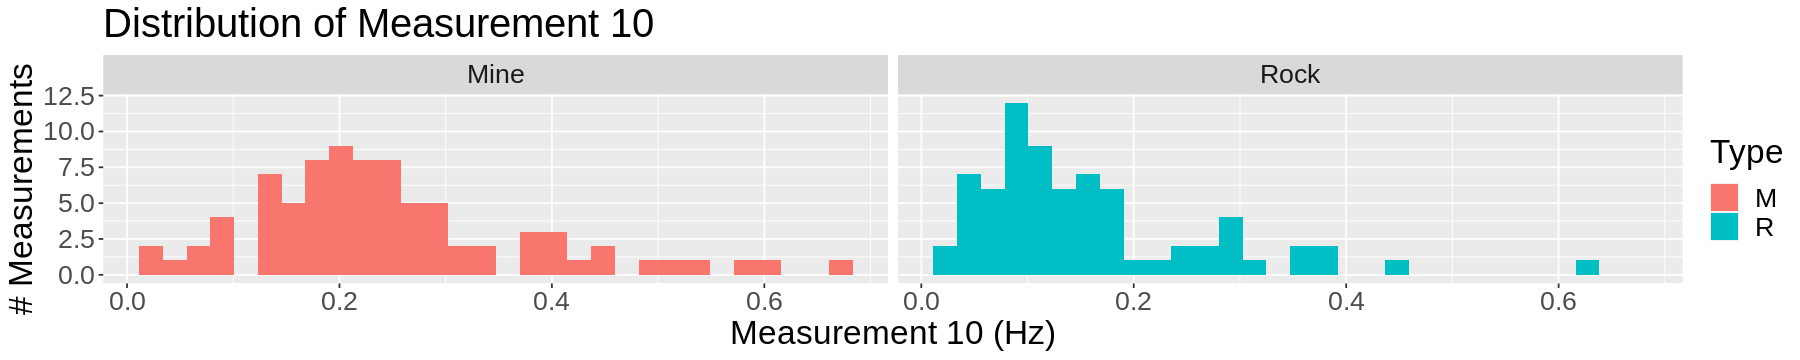

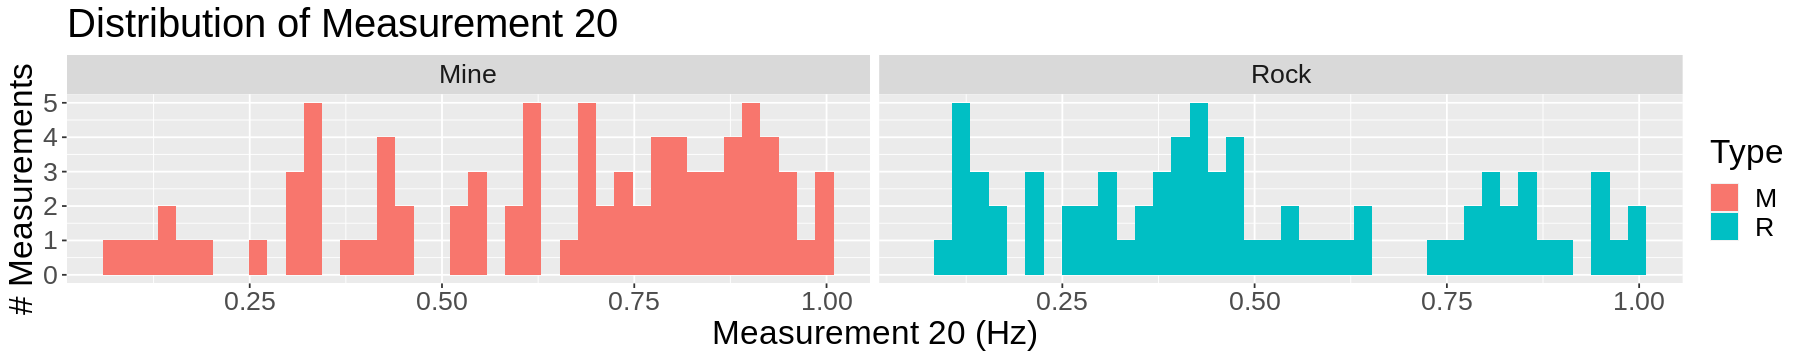

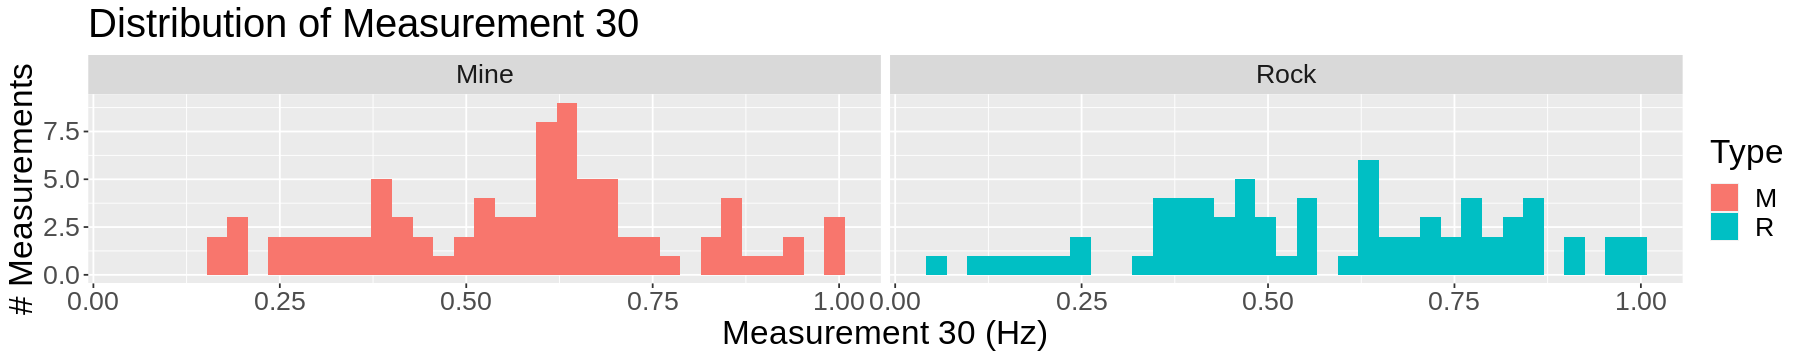

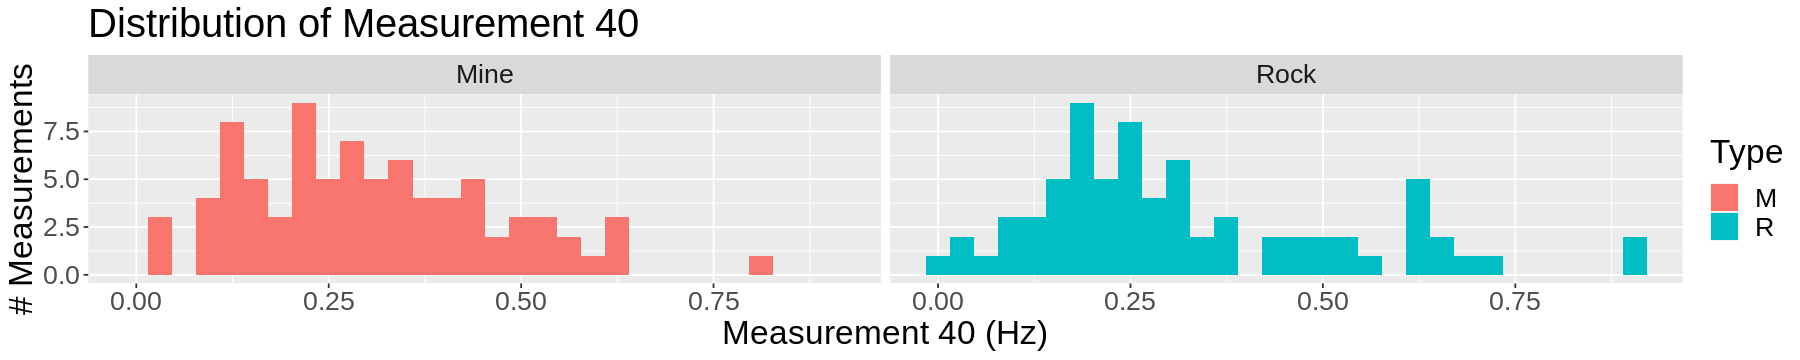

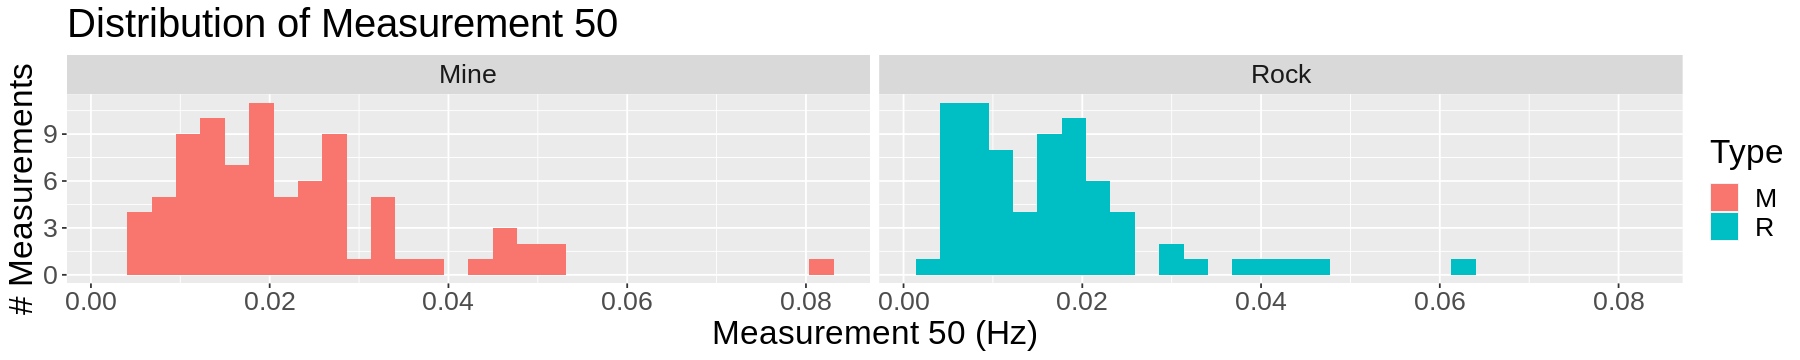

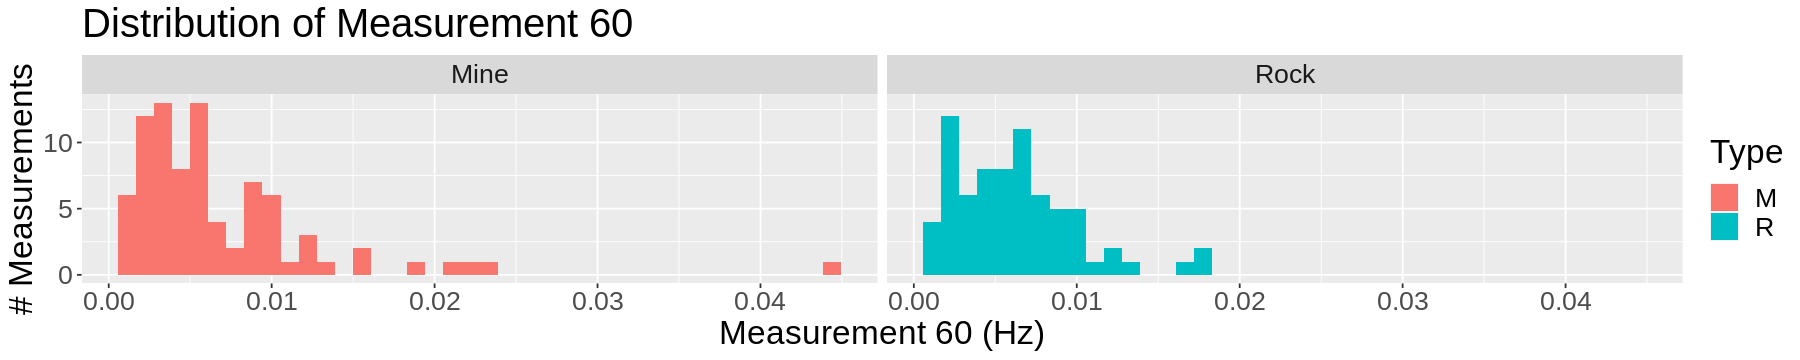

In [25]:
library(RColorBrewer)

options(repr.plot.width = 15, repr.plot.height = 3) 
dist_plot_1 <- sonar_train |>
    ggplot(aes(x = X1, fill = type)) +
    geom_histogram(bins = 40) +
    facet_grid(cols = vars(type), labeller = as_labeller(c(M = "Mine", R = "Rock"))) +
    labs(x = "Measurement 1 (Hz)", y = "# Measurements", fill = "Type") +
    theme(text = element_text(size=20)) +
    scale_color_brewer(palette = "Set2") +
    ggtitle("Distribution of Measurement 1")
dist_plot_1

dist_plot_10 <- sonar_train |>
    ggplot(aes(x = X10, fill = type)) +
    geom_histogram(bins = 30) +
    facet_grid(cols = vars(type), labeller = as_labeller(c(M = "Mine", R = "Rock"))) +
    labs(x = "Measurement 10 (Hz)", y = "# Measurements", fill = "Type") +
    theme(text = element_text(size=20)) +
    scale_color_brewer(palette = "Set2") +
    ggtitle("Distribution of Measurement 10")
dist_plot_10

dist_plot_20 <- sonar_train |>
    ggplot(aes(x = X20, fill = type)) +
    geom_histogram(bins = 40) +
    facet_grid(cols = vars(type), labeller = as_labeller(c(M = "Mine", R = "Rock"))) +
    labs(x = "Measurement 20 (Hz)", y = "# Measurements", fill = "Type") +
    theme(text = element_text(size=20)) +
    scale_color_brewer(palette = "Set2") +
    ggtitle("Distribution of Measurement 20")
dist_plot_20 

dist_plot_30 <- sonar_train |>
    ggplot(aes(x = X30, fill = type)) +
    geom_histogram(bins = 35) +
    facet_grid(cols = vars(type), labeller = as_labeller(c(M = "Mine", R = "Rock"))) +
    labs(x = "Measurement 30 (Hz)", y = "# Measurements", fill = "Type") +
    theme(text = element_text(size=20)) +
    scale_color_brewer(palette = "Set2") +
    ggtitle("Distribution of Measurement 30")
dist_plot_30

dist_plot_40 <- sonar_train |>
    ggplot(aes(x = X40, fill = type)) +
    geom_histogram(bins = 30) +
    facet_grid(cols = vars(type), labeller = as_labeller(c(M = "Mine", R = "Rock"))) +
    labs(x = "Measurement 40 (Hz)", y = "# Measurements", fill = "Type") +
    theme(text = element_text(size=20)) +
    scale_color_brewer(palette = "Set2") +
    ggtitle("Distribution of Measurement 40")
dist_plot_40

dist_plot_50 <- sonar_train |>
    ggplot(aes(x = X50, fill = type)) +
    geom_histogram(bins = 30) +
    facet_grid(cols = vars(type), labeller = as_labeller(c(M = "Mine", R = "Rock"))) +
    labs(x = "Measurement 50 (Hz)", y = "# Measurements", fill = "Type") +
    theme(text = element_text(size=20)) +
    scale_color_brewer(palette = "Set2") +
    ggtitle("Distribution of Measurement 50")
dist_plot_50 

dist_plot_60 <- sonar_train |>
    ggplot(aes(x = X60, fill = type)) +
    geom_histogram(bins = 40) +
    facet_grid(cols = vars(type), labeller = as_labeller(c(M = "Mine", R = "Rock"))) +
    labs(x = "Measurement 60 (Hz)", y = "# Measurements", fill = "Type") +
    theme(text = element_text(size=20)) +
    scale_color_brewer(palette = "Set2") +
    ggtitle("Distribution of Measurement 60")
dist_plot_60 

Distribtion of predictor values for X1, X10, X20, X40, X50 and X60

## Methods

**Splitting the Data**

The data set will be split into training data for training a K-nearest neighbors’ classifier and testing data for testing the accuracy of the classifier. 
Training data will be used to train a K-nearest neighbors’ classifier. Predictor variables used will be X1 to X60, corresponding to increasing order of aspect angle. 

**Cross-Validation**

The training set will be split for cross-validation and analyzed to find the K-nearest neighbours most suitable for tuning the classifier.  

**Testing Accuracy**

The accuracy of the classifier will be estimated on the test set using the predict function to determine if accurate predictions on data will be seen on data not seen during training.

## Expected outcome and significance

- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?